# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 13

#from sklearn.preprocessing import StandardScaler

%run useful.py

# training data
perc_train = 0.8

## Read data

(2000, 8)
8
[1.83918812 2.04560279 5.67725029 5.95544703 9.6451452  6.53177097
 7.48906638 6.53569871] 1
[7.47714809 9.61306736 0.08388298 1.06444377 2.98703714 6.56411183
 8.09812553 8.72175914] 0
[9.64647597 7.23685347 6.42475328 7.17453621 4.67599007 3.25584678
 4.39644606 7.29689083] 0
[9.94014586 6.76873712 7.90822518 1.70914258 0.26849276 8.00370244
 9.03722538 0.2467621 ] 0
[4.91747318 5.26255167 5.9636601  0.51957545 8.95089528 7.2826618
 8.18350011 5.00222753] 1
data: 2000
train: 1600


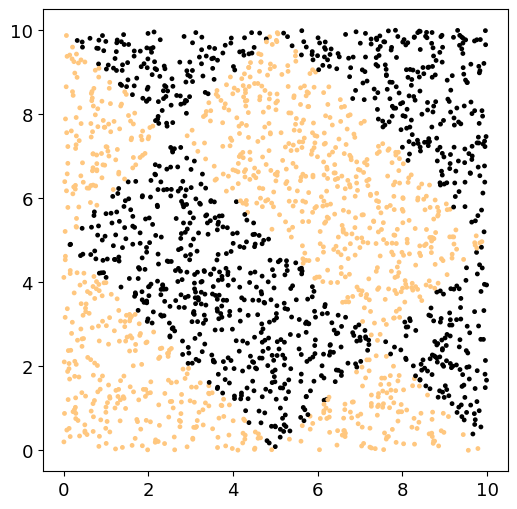

In [2]:
# Keras works with numpy arrays: just use them from the start

TYPE=3
# data point size
L=8 
# span of each component
B=10
x = np.loadtxt(filename("data",L,TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",L,TYPE), delimiter=' ')
y = y.astype("int")
print(x.shape)
N = len(x)
# average and std.dev.
x_mean = np.mean(x,axis=0)
x_std  = np.std(x,axis=0)


# dim. of a sample
L = len(x[0])
print(L)

for i in range(5):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plot_data(x,y)

## Standardize data

In [3]:
print("before rescaling:\nmean value=", x_mean,"\nstd. dev.=",x_std)
def Standardize(x,m,s):
    """
    rescale each component using its mean and standard deviation
    """
    N = len(x)
    # assuming len(m)=len(s)=len(x[0])
    mm,ss = np.tile(m,(N,1)), np.tile(s,(N,1))
    return (x-mm)/ss
x = Standardize(x,x_mean,x_std)
print("after rescaling:\nmean value=", x.mean(axis=0),"\nstd. dev.=",x.std(axis=0))

before rescaling:
mean value= [5.01860571 5.01726228 5.02153857 5.08947968 5.10248206 5.03670082
 4.88645281 5.05411547] 
std. dev.= [2.86912607 2.89535235 2.87312372 2.86324409 2.90278676 2.91948328
 2.92549254 2.89281292]
after rescaling:
mean value= [ 2.53633226e-15  9.27924404e-16 -1.44884105e-15 -2.38371996e-15
 -2.85274582e-15 -2.02196593e-15 -1.09010023e-15 -1.53632662e-15] 
std. dev.= [1. 1. 1. 1. 1. 1. 1. 1.]


## Split training and test data

In [4]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 1600 	 Validation: 400


## Define the model with Keras / Tensorflow

In [5]:
# reproducibility (?)
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

model = Sequential() #standard neural network most basic model
model.add(Dense(L,input_shape=(L,),activation='relu')) # first layer, dense (full connectivity)
model.add(Dense(20,activation='relu')) # second layer
model.add(Dropout(0.1)) # dropout: with probability 0.1, a node disappears. to make model more robust (
# ensure that even if a node is missing, the network overall still works)
model.add(Dense(20,activation='relu')) # third layer
model.add(Dropout(0.1)) 
model.add(Dense(20,activation='relu')) # fourth layer
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid')) # output layer (for binary classification)
nepoch=400

c:\Users\angel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Optimization method and cost function

In [6]:
model.compile(loss='binary_crossentropy', #kl divergence
              optimizer='RMSprop',
              #optimizer='adam',
              metrics=['accuracy'])

## Training

In [7]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
32/32 - 2s - 66ms/step - accuracy: 0.4956 - loss: 0.6989 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 2/400
32/32 - 0s - 5ms/step - accuracy: 0.4931 - loss: 0.6990 - val_accuracy: 0.5375 - val_loss: 0.6913
Epoch 3/400
32/32 - 0s - 4ms/step - accuracy: 0.4894 - loss: 0.6930 - val_accuracy: 0.5650 - val_loss: 0.6876
Epoch 4/400
32/32 - 0s - 4ms/step - accuracy: 0.5150 - loss: 0.6913 - val_accuracy: 0.5750 - val_loss: 0.6850
Epoch 5/400
32/32 - 0s - 4ms/step - accuracy: 0.5294 - loss: 0.6866 - val_accuracy: 0.5625 - val_loss: 0.6826
Epoch 6/400
32/32 - 0s - 4ms/step - accuracy: 0.5312 - loss: 0.6893 - val_accuracy: 0.5775 - val_loss: 0.6806
Epoch 7/400
32/32 - 0s - 3ms/step - accuracy: 0.5462 - loss: 0.6848 - val_accuracy: 0.5675 - val_loss: 0.6785
Epoch 8/400
32/32 - 0s - 4ms/step - accuracy: 0.5337 - loss: 0.6865 - val_accuracy: 0.5825 - val_loss: 0.6775
Epoch 9/400
32/32 - 0s - 4ms/step - accuracy: 0.5394 - loss: 0.6855 - val_accuracy: 0.5775 - val_loss: 0.6757
Epoch 10/

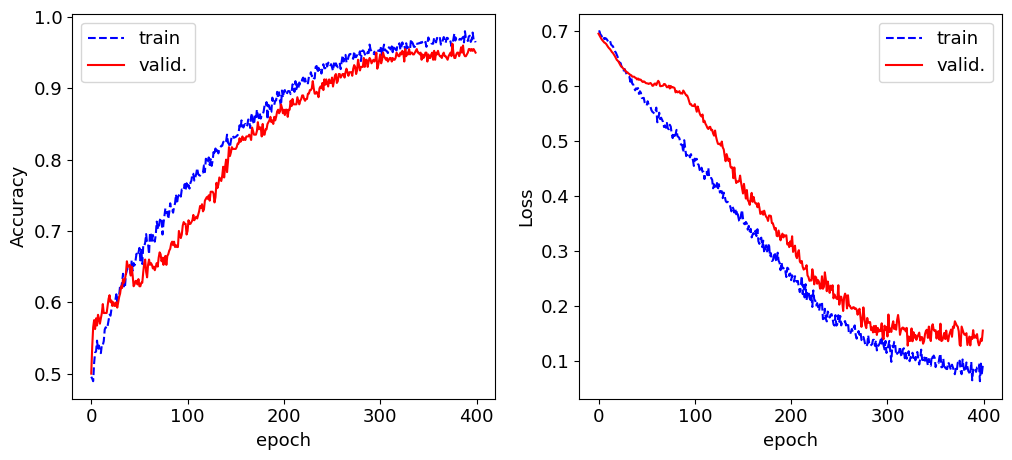

In [8]:
fig,AX=plt.subplots(1,2,figsize=(12,5.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b",ls="--")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b",ls="--")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## Grid to show preditions

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


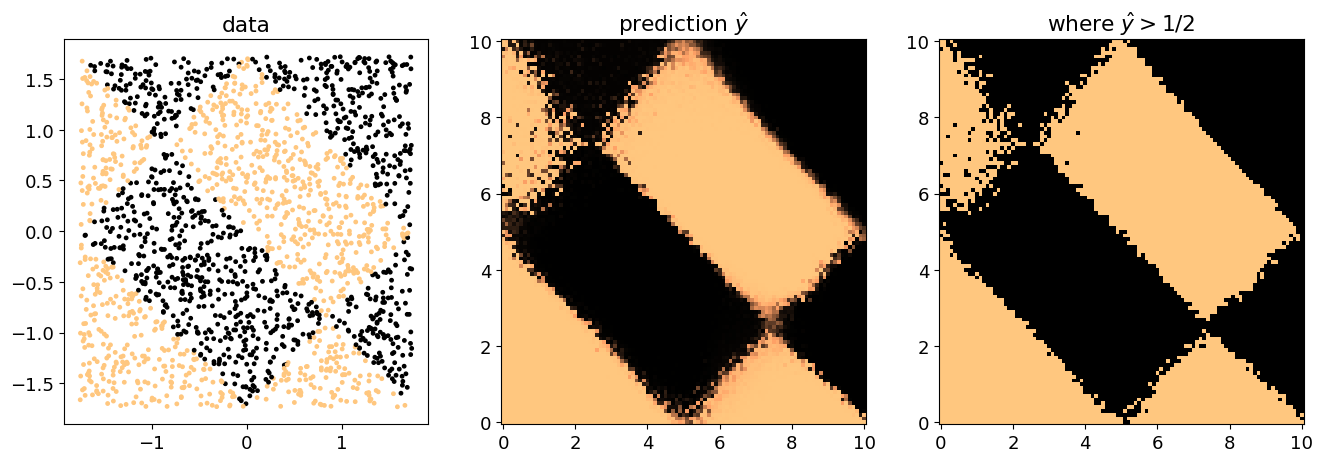

remember: these ar 2 out of L=8 dimensions, of which L-2 contain random noise


In [9]:
dX = .1
X1 = np.arange(0,10+dX, dX)
LG = len(X1)
X, Y = np.meshgrid(X1, X1)
allXY = np.reshape((np.array((X,Y)).T),(LG**2,2))
grid = np.random.rand(LG**2,L)*B
grid[:,:2] = allXY
grid_r=Standardize(grid,x_mean,x_std)

pred = model.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y,s=6)
ax.set_title("data")
ax=AX[1]
ax.pcolormesh(X1,X1,pred.reshape((LG, LG)))
ax.set_title("prediction $\\hat y$")
ax=AX[2]
pred01=np.copy(pred)
pred01[pred>0.5]=1
pred01[pred<=0.5]=0
ax.pcolormesh(X1,X1,pred01.reshape((LG, LG)))
ax.set_title("where $\\hat y > 1/2$")
plt.show()
print(f"remember: these ar 2 out of L={L} dimensions, of which L-2 contain random noise")